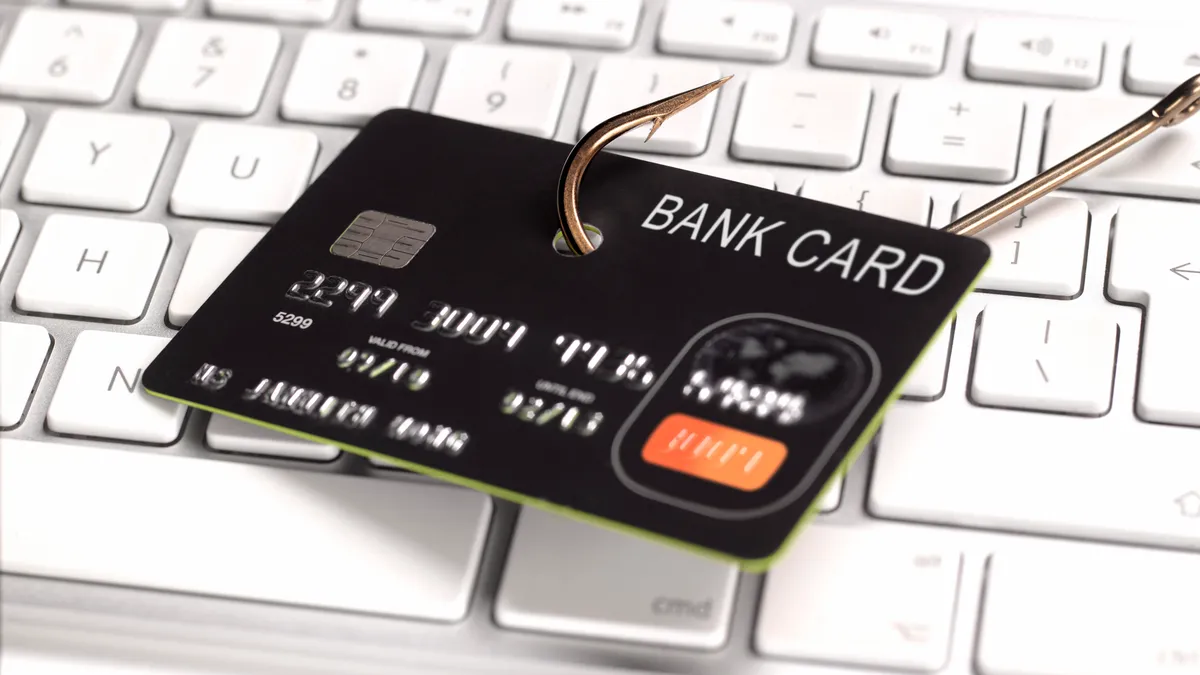

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.132% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The steps taken for this work:
    
    1. Loading the dataset
    2. Exploring the dataset
    3. Exploratory data analysis (EDA)
    4. Selecting the correct model
    5. Conclusion

# 1. Loading The Dataset

In [134]:
# importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer

In [135]:
# loading the dataset from the local machine
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Exploring The Dataset

In [136]:
# using the info() attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset has 31 columns from which only ```Class``` is ```int64``` and the rest are ```float64``` datatype. Three of the features have names such as ```Time```, ```Amount```, and ```Class```. The rest are features that were acquired through PCA.

In [137]:
# using describe() attribute
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Although this table looks gibberish but some intuitions can be extracted from this. In this dataset, ```Time``` is the seconds elapsed between each transaction and the first transaction in the dataset. So, 75% of the transactions were made almost 39 hours from the first transaction. The ```Amount``` feature is the transaction amount. 75% of the transactions were valued less than £80. Weirdly, the maximum transaction amount is more than £26,000. We will dig deep afterwards. Our target variable ```Class``` only contains 0 and 1 denoting valid and fraudulant transactions respectively.

# 3. Exploratory Data Analysis (EDA)

At a first glance I had noticed that there were some unusual transactions, and quite greater in number. No, it is not about the extensive amount of £26,000. I have noticed that some transactions have zero amount. I classify these type of transactions as "empty transactions" as zero means empty in a sense.

In [138]:
# finding the empty transactions
emp_trans_data = data[["Time","Amount","Class"]]
display(emp_trans_data[emp_trans_data["Amount"] == 0])

,Time,Amount,Class
383,282.0,0.0,0
514,380.0,0.0,0
534,403.0,0.0,0
541,406.0,0.0,1
575,430.0,0.0,0
...,...,...,...
283719,171817.0,0.0,0
283782,171870.0,0.0,0
283949,172027.0,0.0,0
284085,172140.0,0.0,0


As we can see there are more than 1800 records that are empty transactions. For clarity, I have kept only three features. Surprisingly, we can see that some empty transactions such as 541th is classified as a fraudulant transaction. Let's see how many of these transactions were recorded.

In [139]:
# fraudulant empty transactions
fraud_emp_data = emp_trans_data[(emp_trans_data["Amount"] == 0) & (emp_trans_data["Class"] == 1)]
fraud_emp_data.shape[0]

27

So, there are 27 empty fraudulant transactions among all the transactions made within two days. I find it very interesting because I have not yet come across these kind of records. So, what can be the explanation?

Turns out, in banking, transactions with a $0 value are typically referred to as "zero-dollar transactions" or "zero-amount transactions." These transactions are often created as placeholders or markers in the system. They can occur for various reasons, such as:

* **Account Verification:** A zero-dollar transaction may be used to verify an account’s validity without transferring any funds. This is common during the account setup or linking process.

* **Authorization Holds:** Sometimes, merchants perform zero-dollar authorizations to check that a credit card or debit card is active and has credit availability without charging the account.

* **System Logging:** Some banking systems use zero-dollar transactions to log events or actions, such as balance inquiries or failed transactions, where no funds are actually transferred.

* **Internal Testing:** Banks might use these transactions for internal testing or system checks.

*For more about this visit https://trustpair.com/blog/ach-prenote-how-does-it-work-and-is-it-enough-to-prevent-fraud/*

---
There goes the mystery behind zero-dollar transactions or as I call the "empty transactions". But why are they classified as fraudulent?

It seems that cyber criminals often make these transactions for the following reasons:

* Account Validation
* Card Testing
* Fraudulent Token Generation

There are other PCA variables i.e. V1, V2, ... that can help determine the reason behind the classification. We will delve into those variables in a bit.

Apart from zero-dollar transactions, there is one other major observation which must be addressed. As it is mentioned in the top that the total number of transactions is 284,807 and only 492 of them are classified as fraudulent. This shows that the dataset is highly unbalanced. If we want our model to correctly classify rather than assume, we can not use this dataset as base for training our model. Otherwise, our model will assume any transaction as non-fraudulent because only 0.173% of the transactions are fraudulent.

In [140]:
# percentage non-fraudulent transactions
non_frd_data = data[data["Class"]==0].shape[0]
display(round(non_frd_data / (data.shape[0]) * 100, 3))

99.827

In [141]:
# percentage fraudulent transactions
frd_data = data[data["Class"]==1].shape[0]
display(round(frd_data / (data.shape[0]) * 100, 3))

0.173

Before training our model with this dataset we need to find out how well the features are distributed. Since we only have ```Time``` and ```Amount``` features which are not PCA-ed and ```Class``` is our target feature, we need to understand these two at first.

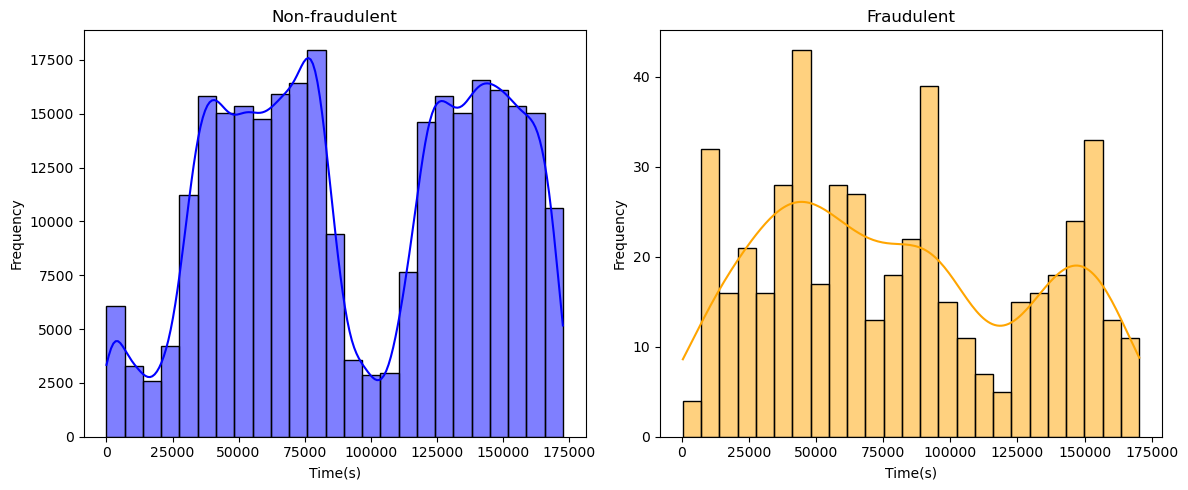

In [142]:
# distribution of Time feature
class_0 = data[data["Class"]==0]["Time"]
class_1 = data[data["Class"]==1]["Time"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plotting histogram for Non-fraudulent transactions
sns.histplot(class_0, ax=axs[0], bins=25, color='blue', kde=True)
axs[0].set_title('Non-fraudulent')
axs[0].set_xlabel('Time(s)')
axs[0].set_ylabel('Frequency')

# plotting histogram for fraudulent transactions
sns.histplot(class_1, ax=axs[1], bins=25, color='orange', kde=True)
axs[1].set_title('Fraudulent')
axs[1].set_xlabel('Time(s)')
axs[1].set_ylabel('Frequency')

# showing the plot
plt.tight_layout()
plt.show()

The distribution clearly shows that fraudulent transactions are more evenly distributed than the normal ones. The normal ones actually shows a cyclic distribution which indicates both 'peak' and 'off-peak' times. We may find unusual transactions in the 'off-peak' times.

Also after looking into the blue histogram, we can conclude that normal transactions were low in the nights in European timezone and higher in daylights. Although this may look logical cause most of the people use atms in daylight, but this will help us target frauds cause most of the cyber attack usually happens at night.

As the ```Time``` column in the dataset represents the seconds elapsed since the first recorded transaction, analyzing the differences between consecutive transaction times may define some interesting patterns, such as rapid successive transactions that might indicate suspicious behavior (e.g., automated fraud attempts).

In [143]:
# filtering the dataset
temp_data = data[["Time","Amount","Class"]]
#  differences between consecutive transaction times using diff() from pandas
temp_data = temp_data.sort_values(by='Time')
temp_data['Time_Diff'] = temp_data['Time'].diff()

In [144]:
# grouping by Class and computing summary statistics for Time_Diff
fraud_time_diff = temp_data[temp_data['Class'] == 1]['Time_Diff']
normal_time_diff = temp_data[temp_data['Class'] == 0]['Time_Diff']

print("Fraudulent Transactions - Time_Diff Summary:")
print(fraud_time_diff.describe())

print("Normal Transactions - Time_Diff Summary:")
print(normal_time_diff.describe())


Fraudulent Transactions - Time_Diff Summary:
count    492.000000
mean       1.067073
std        1.873161
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       16.000000
Name: Time_Diff, dtype: float64
Normal Transactions - Time_Diff Summary:
count    284314.000000
mean          0.605904
std           1.051240
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          32.000000
Name: Time_Diff, dtype: float64


The ```Time_Diff``` feature represents the time gap (in seconds) between consecutive transactions. For fraudulent transactions, the average time gap is approximately 1.07 seconds, with a maximum gap of 16 seconds. Most fraudulent transactions (75%) occur with a time gap of 1 second or less, and half of them have no gap at all.

In contrast, normal transactions have a lower average time gap of 0.61 seconds, but the maximum gap extends to 32 seconds. Similarly, 75% of normal transactions also occur within a gap of 1 second or less, and 50% have no time gap.

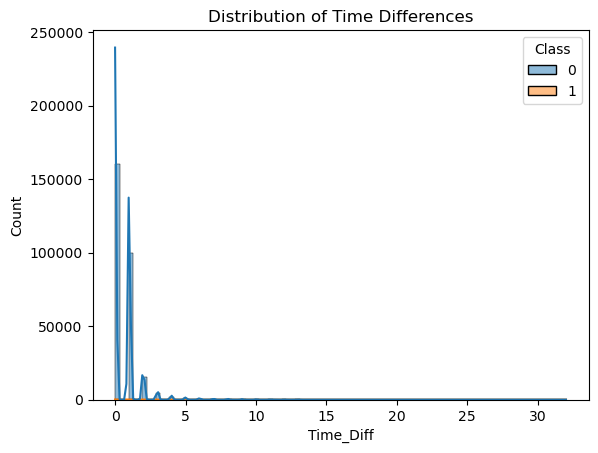

In [145]:
# distribution of Time_Diff feature
sns.histplot(data=temp_data, x='Time_Diff', hue='Class', bins=100, kde=True)
plt.title('Distribution of Time Differences')
plt.show()

The histogram shows that the distribution of ```Time_Diff``` values for both normal and fraudulent transactions. The majority of transactions, regardless of class, occur within very short time intervals, with ```Time_Diff``` values heavily concentrated near zero.

For fraudulent transactions, the distribution follows a similar pattern but appears more evenly spread across slightly larger ```Time_Diff``` values compared to normal transactions. Normal transactions have a steeper decline after the initial peak, indicating that they predominantly occur with minimal time gaps. The presence of a long tail for normal transactions shows occasional longer time gaps, which are rare for fraudulent activity.

This pattern suggests that fraudulent transactions tend to occur in clusters or bursts over shorter intervals, while normal transactions exhibit more variability in their temporal gaps.

Fraud Clusters Detected: Time
406.0       1
472.0       1
4462.0      1
6986.0      1
7535.0      1
           ..
166028.0    1
166831.0    1
167338.0    1
169347.0    1
170348.0    1
Length: 237, dtype: int64


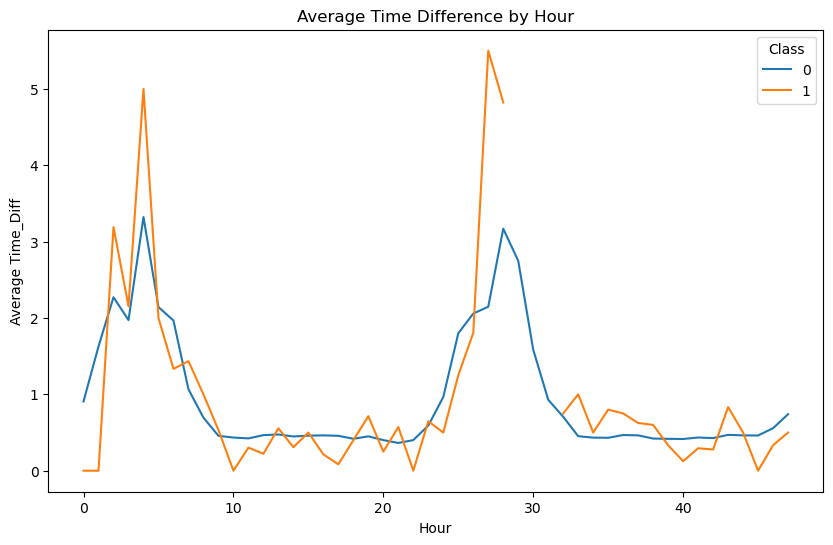

In [146]:
# consecutive fraud transactions analysis
temp_data['Is_Fraud_Consecutive'] = (temp_data['Class'] == 1) & (temp_data['Time_Diff'] < 1)
fraud_clusters = temp_data[temp_data['Is_Fraud_Consecutive']].groupby('Time').size()
print(f"Fraud Clusters Detected: {fraud_clusters}")

# Time of Day Analysis
temp_data['Hour'] = temp_data['Time'] // 3600 
hourly_analysis = temp_data.groupby(['Hour', 'Class'])['Time_Diff'].mean().unstack()
hourly_analysis.plot(kind='line', figsize=(10, 6), title='Average Time Difference by Hour')
plt.ylabel('Average Time_Diff')
plt.show()

The line plot shows the average time difference (Time_Diff) by the hour for both normal (Class = 0) and fraudulent (Class = 1) transactions. Fraudulent transactions display a clear tendency to occur in bursts or clusters, as shown by significant spikes in average time differences during certain hours (e.g., around hours 5 and 28). These bursts suggest that fraudulent transactions are often concentrated within short intervals, possibly indicative of coordinated attacks or automated processes.

For normal transactions, the average Time_Diff shows a more stable trend, but occasional longer time gaps are visible, especially during off-hours (e.g., early morning hours around 20–33). This pattern aligns with expected user behavior, where fewer transactions are conducted during non-business hours. The stability and periodic peaks for normal transactions suggest cyclic trends, such as higher activity during daytime and reduced activity at night.

These insights are crucial for temporal pattern analysis. The bursts in fraudulent transactions could guide the model to recognize clustered anomalies, while the off-hour gaps in normal transactions provide context for distinguishing between genuine and suspicious activity. To do that, we have to do some **Feature Engineering**. 
***

There are some features that may help us with getting more accurate results. They are:

**is_burst_period:** This binary feature flags whether a transaction occurs during a burst of activity, characterized by a series of short ```Time_Diff``` values. Fraudulent transactions are often concentrated in bursts, making this feature critical for identifying temporal clustering and distinguishing them from normal transaction patterns.

**is_peak_hour:** This binary feature indicates whether a transaction occurred during the identified "busy hours." Fraudulent transactions often exploit periods of high activity to blend in, making this feature valuable for identifying temporal patterns tied to fraud-prone intervals.

**mean_time_diff_by_hour:** Capturing the average ```Time_Diff``` for each hour provides insights into typical transaction behavior during different times of the day. Fraudulent transactions deviating significantly from these averages can be flagged as anomalous, boosting the model's ability to identify outliers.

**std_time_diff_by_hour:** The standard deviation of ```Time_Diff``` by hour highlights periods with irregular transaction activity. Higher variability in certain hours may indicate opportunistic fraudulent behavior, helping the model detect transactions occurring in unstable patterns.

**distance_to_peak:** This feature measures the proximity of a transaction's ```Time_Diff``` to the known peak values, aiding in identifying fraudulent transactions that cluster around these high-risk intervals. It directly captures temporal clustering behavior, improving detection accuracy.

**time_cluster:** Categorizing transactions into clusters based on temporal patterns (e.g., frequent short bursts or long gaps) enables the model to distinguish distinct transaction behaviors. Fraudulent transactions often form tight clusters, making this feature useful for anomaly detection.

**fraud_count_last_10:** Tracking the number of fraudulent transactions in the last 10 transactions helps the model learn localized fraud trends. Fraudulent behavior often occurs in bursts, and this feature helps capture sequential anomalies in real-time.

**time_diff_normalized:** Normalizing ```Time_Diff``` makes it scale-invariant, allowing algorithms to learn its significance without being biased by the raw magnitude. This is especially useful for comparing transaction intervals across different scales and detecting deviations effectively.

In [147]:
# creating a feature that indicates whether a transaction occurs during a temporal burst or not
burst_hours = [5, 28]
temp_data['is_burst_period'] = temp_data['Hour'].apply(lambda x: 1 if x in burst_hours else 0)

# another feature for flagging peak-hour transactions
temp_data['is_peak_hour'] = temp_data['Hour'].apply(lambda x: 1 if 10 <= x <= 22 else 0)

# features that capture the local variations in time differences
temp_data['mean_time_diff_by_hour'] = temp_data.groupby('Hour')['Time_Diff'].transform('mean')
temp_data['std_time_diff_by_hour'] = temp_data.groupby('Hour')['Time_Diff'].transform('std')

#  feature that measures how close a transaction’s Time_Diff is to the fraudulent transaction peaks
temp_data['distance_to_peak_5'] = abs(temp_data['Hour'] - burst_hours[0])
temp_data['distance_to_peak_28'] = abs(temp_data['Hour'] - burst_hours[1])

# a feature to classify transactions into clusters
temp_data.loc[0, 'Time_Diff'] = 0.0
kmeans = KMeans(n_clusters=3)
temp_data['time_cluster'] = kmeans.fit_predict(temp_data[['Time', 'Time_Diff']])

# a feature that counts how many fraudulent transactions occur in the last n transactions
temp_data['fraud_count_last_10'] = temp_data['Class'].rolling(10).sum()

# normalized time_diff feature
temp_data['time_diff_normalized'] = (temp_data['Time_Diff'] - temp_data['Time_Diff'].mean()) / temp_data['Time_Diff'].std()

After having checked the ```Time``` feature thoroughly, now it's time to delve deep into ```Amount```, another important feature. First let us understand the distribution for both type of transactions.

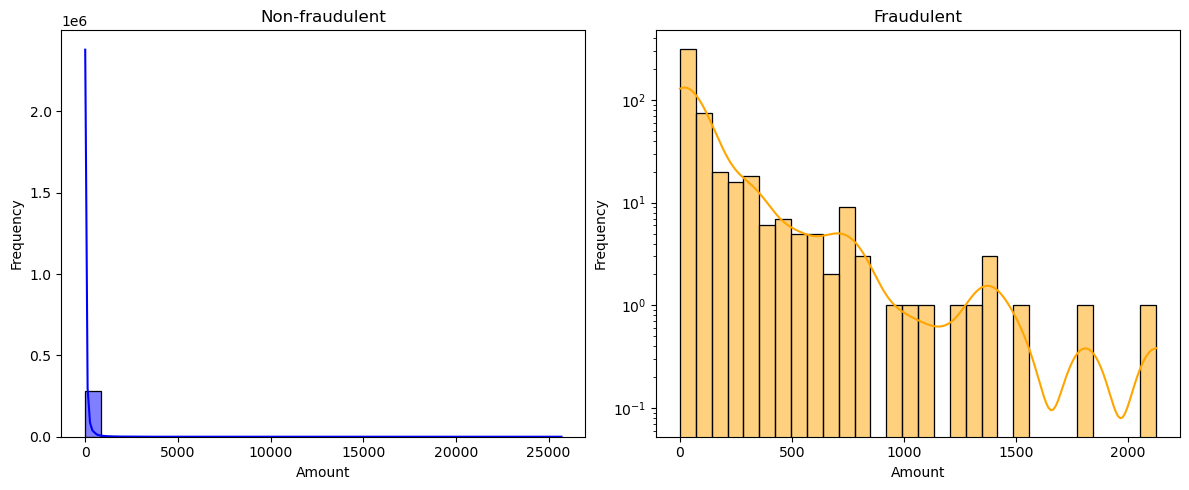

In [148]:
# distribution of Amount feature
class_0 = data[data["Class"]==0]["Amount"]
class_1 = data[data["Class"]==1]["Amount"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plotting histogram for Non-fraudulent transactions
sns.histplot(class_0, ax=axs[0], bins=30, color='blue', kde=True)
axs[0].set_title('Non-fraudulent')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Frequency')

# plotting histogram for fraudulent transactions
sns.histplot(class_1, ax=axs[1], bins=30, color='orange', kde=True)
axs[1].set_title('Fraudulent')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Frequency')

# showing the plot
plt.tight_layout()
plt.yscale('log')
plt.show()

From these distributions, we can easily verify that the usual amount in non-fraudulent transactions does not exceed £2000 and in fraudulent transactions does not exceed £1000. Although there are cases where both types include records more than the usual amount. But we can see a clearer picture from the above charts.

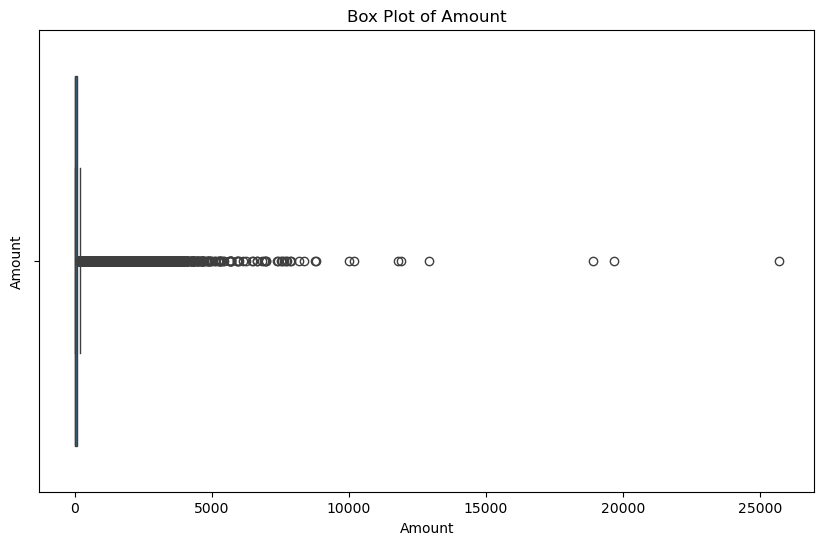

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=data)

# Add title and labels
plt.title('Box Plot of Amount')
plt.ylabel('Amount')

# Show the plot
plt.show()

The box plot for the ```Amount``` feature reveals a highly skewed distribution with a significant presence of outliers. The majority of transaction amounts are concentrated within a narrow range near the lower end, while a few transactions have amounts exceeding £10,000, with the maximum reaching beyond £25,000. Additionally, the dense clustering near the lower range indicates that most transactions are of small amounts, which is consistent with typical transaction patterns.

Before we go on further deep with ```Amount```, let's look at a scatterplot relating our engineered feature ```Time_Diff``` and ```Amount```.

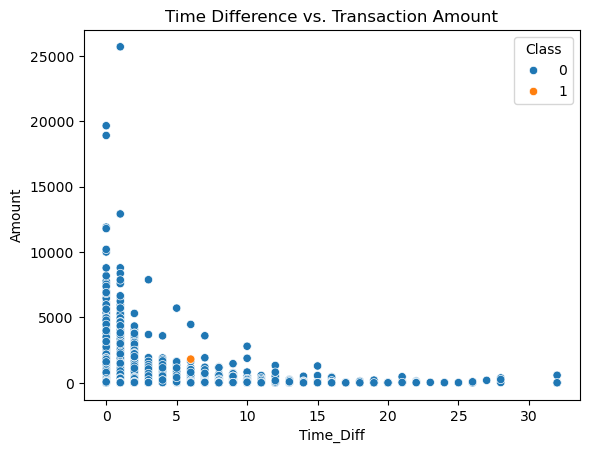

In [150]:
sns.scatterplot(data=temp_data, x='Time_Diff', y='Amount', hue='Class')
plt.title('Time Difference vs. Transaction Amount')
plt.show()

The scatter plot of ```Time_Diff``` vs. ```Amount``` suggests that transactions with very short ```Time_Diff``` tend to have a wide range of amounts, including both low and very high values. However, as ```Time_Diff``` increases, the transaction amounts predominantly cluster around lower values, and fewer transactions are observed with high amounts. This indicates that high-value transactions are more likely to occur close together in time, whereas lower-value transactions are distributed across larger time gaps. 

The ```Amount``` feature will be a great set of information to explore. Let's see if we can define some fraudulent ranges of ```Amount``` that will help use to estimate the fraudulent amount.

             count  Fraud_Rate
Amount_Bin                    
Low          98439    0.002255
Medium-Low  128035    0.000883
Medium       53568    0.002259
High          2933    0.003069
Very High        7    0.000000


C:\Users\amins\AppData\Local\Temp\ipykernel_25476\3199305237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_bin_summary = temp_data.groupby('Amount_Bin')['Class'].agg(['count', 'mean']).rename(columns={'mean': 'Fraud_Rate'})


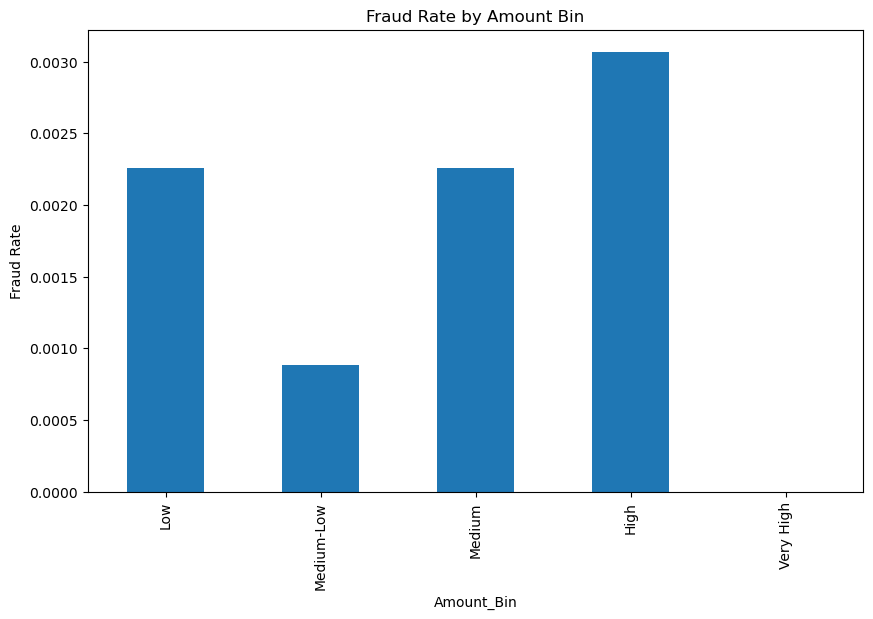

In [151]:
# binning the Amount column
bins = [0, 10, 100, 1000, 10000, temp_data['Amount'].max()]
labels = ['Low', 'Medium-Low', 'Medium', 'High', 'Very High']
temp_data['Amount_Bin'] = pd.cut(temp_data['Amount'], bins=bins, labels=labels)

# calculating fraud rate for each bin
amount_bin_summary = temp_data.groupby('Amount_Bin')['Class'].agg(['count', 'mean']).rename(columns={'mean': 'Fraud_Rate'})
print(amount_bin_summary)

# visualizing fraud rate per bin
amount_bin_summary['Fraud_Rate'].plot(kind='bar', title='Fraud Rate by Amount Bin', figsize=(10, 6))
plt.ylabel('Fraud Rate')
plt.show()

As we can see, the category 'High'(£1000 to £10,000) may have the highest possibility between the fraudulent amount ranges i.e. most likely the fraudulent amounts will be in this range. But let's not stop there. Let's try a **Hypothesis Testing** to find out whether fraud is more likely in specific ```Amount``` ranges.

In [152]:
contingency_table = pd.crosstab(temp_data['Amount_Bin'], temp_data['Class'])
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 2.937336960675823e-17


The p-value is extremely small, much smaller than the typical significance level of 0.05. This indicates strong evidence for the hypothesis in a Chi-Square test of independence. With that let's get into some **Feature Engineering**. 

Since ```Amount_Bin``` and ```Amount``` has a very high dependant relationship, we can assign higher weights to bins with higher fraud likelihood. And  since the ```Amount``` distribution is highly skewed, we will normalize this feature.

In [153]:
# mapping Fraud Probability to each transaction
fraud_prob_mapping = amount_bin_summary['Fraud_Rate'].to_dict()
temp_data['Fraud_Prob_By_Amount'] = temp_data['Amount_Bin'].map(fraud_prob_mapping)
temp_data

,Time,Amount,Class,Time_Diff,Is_Fraud_Consecutive,Hour,is_burst_period,is_peak_hour,mean_time_diff_by_hour,std_time_diff_by_hour,distance_to_peak_5,distance_to_peak_28,time_cluster,fraud_count_last_10,time_diff_normalized,Amount_Bin,Fraud_Prob_By_Amount
0,0.0,149.62,0,0.0,False,0.0,0,0,0.906865,1.106159,5.0,28.0,1,NaN,-0.575954,Medium,0.002259
1,0.0,2.69,0,0.0,False,0.0,0,0,0.906865,1.106159,5.0,28.0,1,NaN,-0.575954,Low,0.002255
2,1.0,378.66,0,1.0,False,0.0,0,0,0.906865,1.106159,5.0,28.0,1,NaN,0.373371,Medium,0.002259
3,1.0,123.50,0,0.0,False,0.0,0,0,0.906865,1.106159,5.0,28.0,1,NaN,-0.575954,Medium,0.002259
4,2.0,69.99,0,1.0,False,0.0,0,0,0.906865,1.106159,5.0,28.0,1,NaN,0.373371,Medium-Low,0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.77,0,1.0,False,47.0,0,0,0.740115,0.844199,42.0,19.0,0,0.0,0.373371,Low,0.002255
284803,172787.0,24.79,0,1.0,False,47.0,0,0,0.740115,0.844199,42.0,19.0,0,0.0,0.373371,Medium-Low,0.000883
284805,172788.0,10.00,0,1.0,False,47.0,0,0,0.740115,0.844199,42.0,19.0,0,0.0,0.373371,Low,0.002255
284804,172788.0,67.88,0,0.0,False,47.0,0,0,0.740115,0.844199,42.0,19.0,0,0.0,-0.575954,Medium-Low,0.000883


In [154]:
# normalizing the feature 
temp_data['Log_Amount'] = np.log1p(temp_data['Amount'])

After going deep with the named fields such as ```Time``` and ```Amount```, lets go deep with the PCA features. First we will generate a heatmap and try to visualize the correlation matrix.

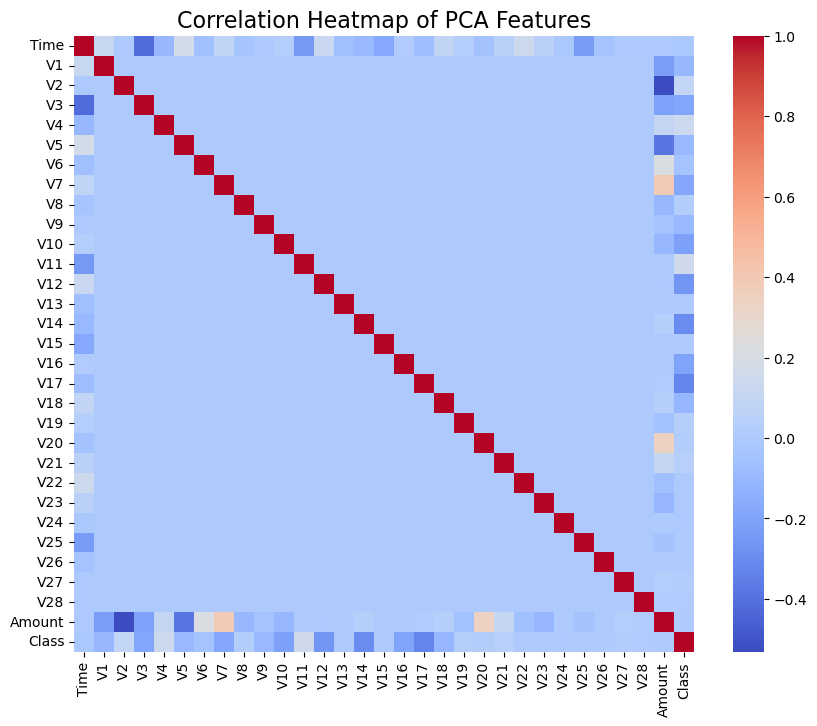

In [155]:
# generating a correlation heatmap

# sepearting the PCA features
# pca_df = data.drop(columns=['Time', 'Amount', 'Class'])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles
plt.title("Correlation Heatmap of PCA Features", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


This heatmap suggests that there are some PCA features that are positively and negatively correlated with ```Time``` and ```Amount```. V7 and V20 are positively and V2 and V5 are negatively correlated with ```Amount```. Also, V3 is negatively correlated with ```Time```.

Now let's see the distribution of the features.

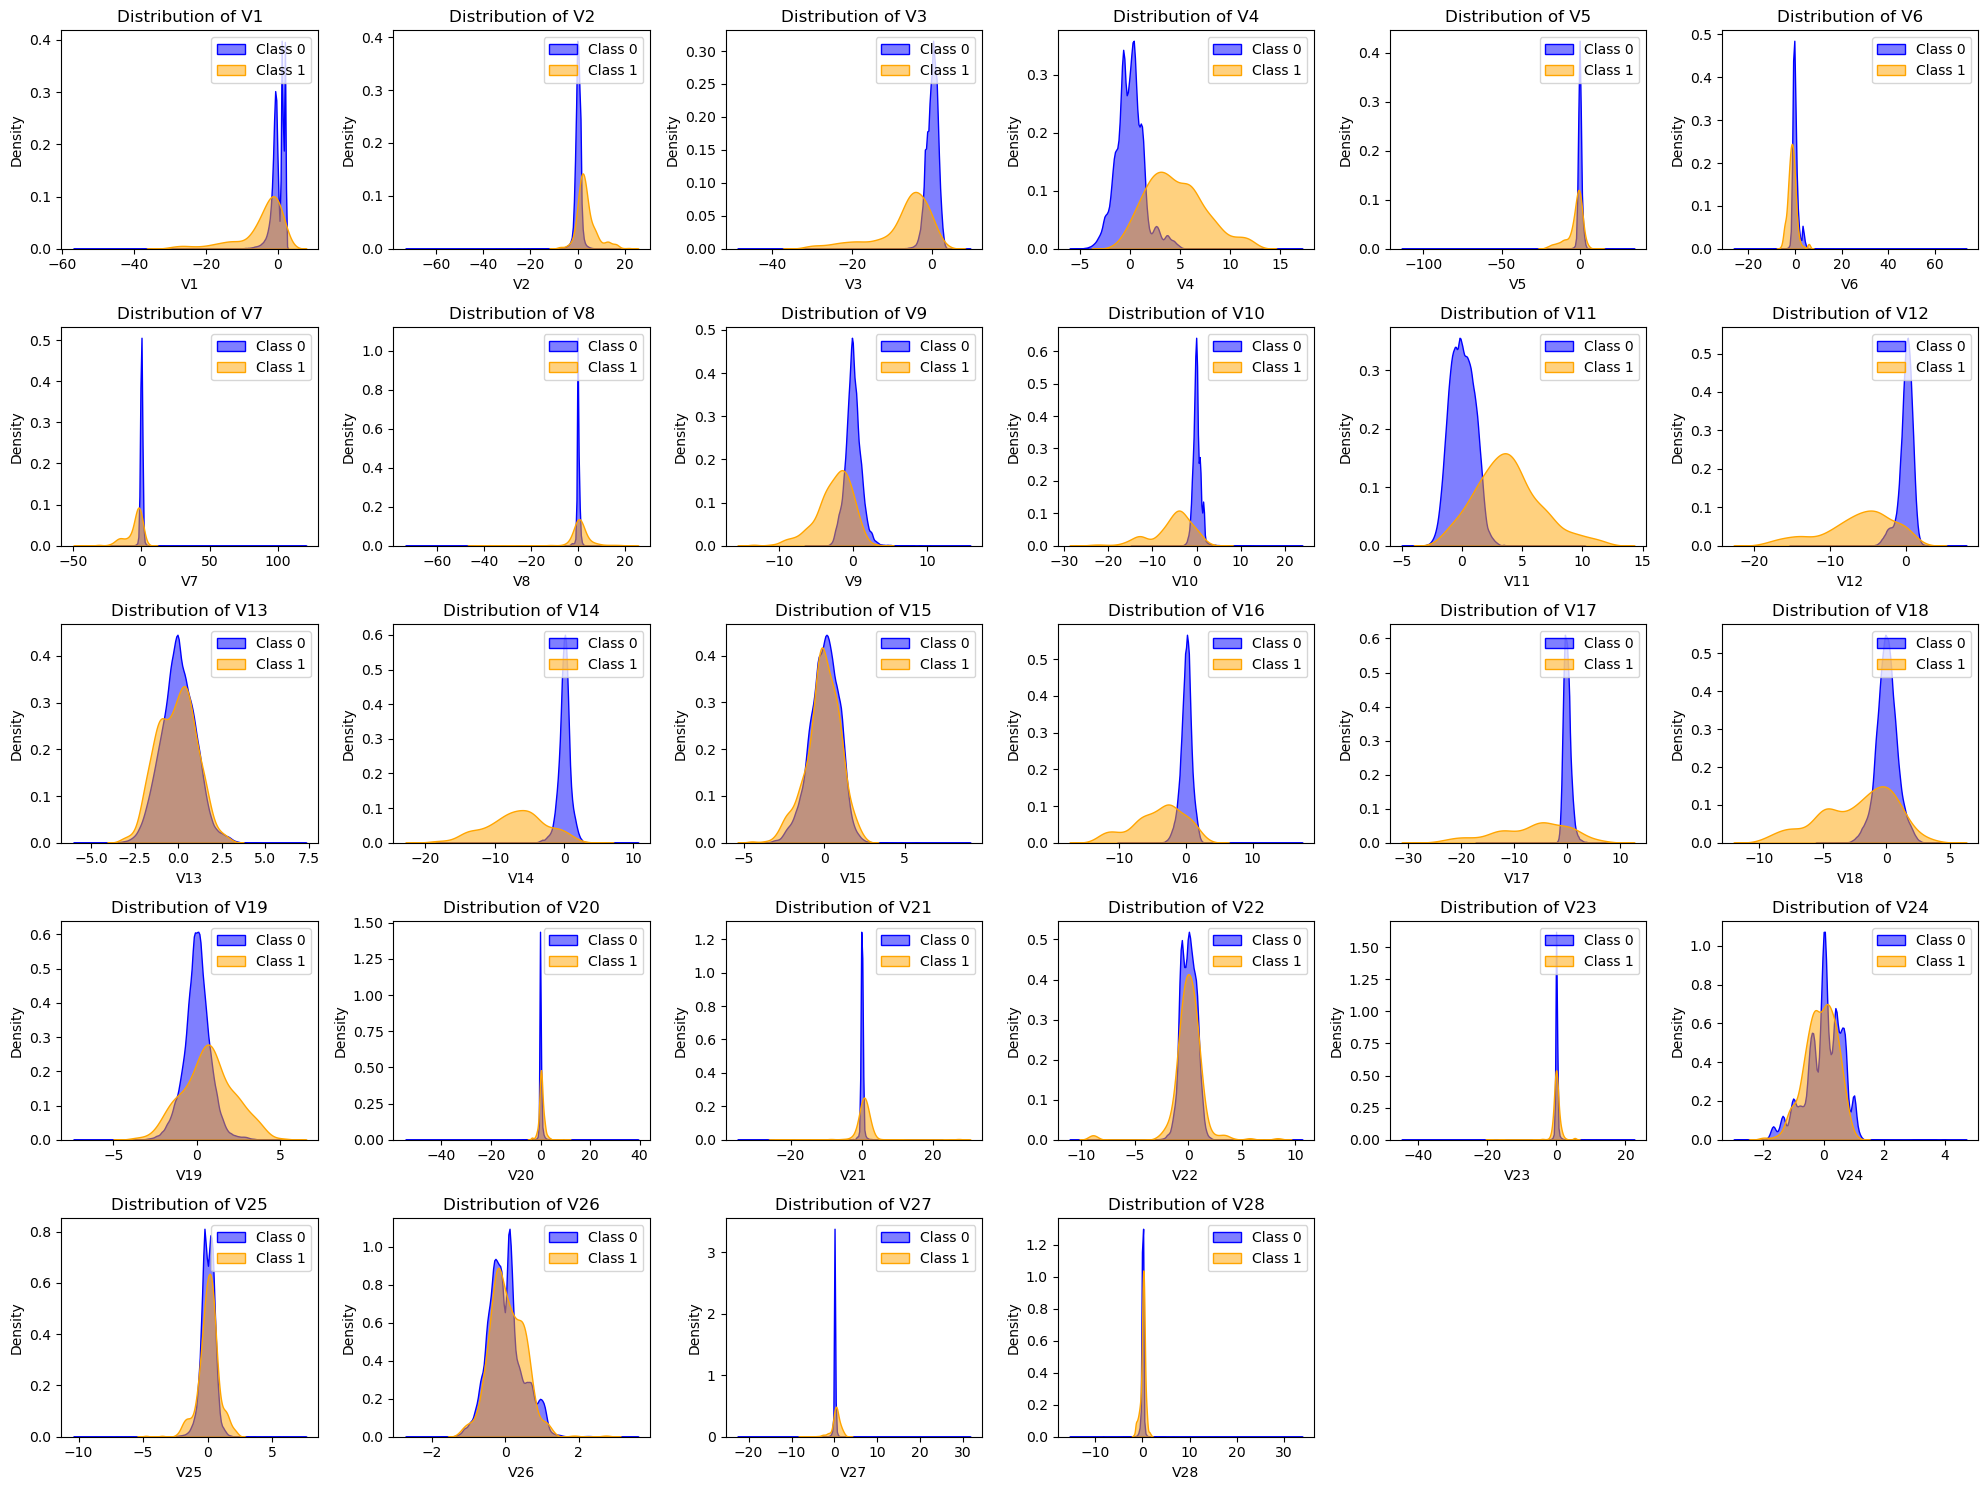

In [156]:
pca_features = [f'V{i}' for i in range(1, 29)]  # Creating list of PCA feature names

# Subplot settings
plt.figure(figsize=(20, 15))
for i, feature in enumerate(pca_features, 1):
    plt.subplot(5, 6, i)  # 5 rows, 6 columns for 28 features
    sns.kdeplot(
        data=data[data['Class'] == 0],
        x=feature,
        fill=True,
        color='blue',
        alpha=0.5,
        label='Class 0'
    )
    sns.kdeplot(
        data=data[data['Class'] == 1],
        x=feature,
        fill=True,
        color='orange',
        alpha=0.5,
        label='Class 1'
    )
    # Add title and legend
    plt.title(f'Distribution of {feature}')
    plt.legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The distributions shows that almost all the features are distributed around 0. But some of them goes away from zero, especially the distribution of the Class 1(Fraud) such as V1, V3, V4, V7, V9, V10, V11, V14 and so on. There are also features that have almost similar distribution for both the classes, V13, V15, V22, V25, and V26.

# 4. Selecting the correct model

Now it is time to select our prediction model. But before that we need to **handle the imbalanced data** cause we only have 400 or so fraudulent transactions against more than 200000 normal transactions. There are two ways to do that, one is with *Oversampling* and the other is *Undersampling*.

**Oversampling:** Oversampling is a technique used in imbalanced datasets where additional copies of the minority class are created to balance the dataset. We will use SMOTE(Synthetic Minority Oversampling Technique) technique to accomplish that.

**Undersampling:** Undersampling is a technique used in imbalanced datasets where samples from the majority class are removed to balance the dataset.

We will do only *Oversampling* and note down the ```roc_auc_score```. We will not include the engineered features except after this part. In that way, we can compare if our engineered features may help increase the score.

In [157]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Class'])  # Dropping the target column
y = data['Class']  # Target column
X.shape, y.shape

((284807, 30), (284807,))

In [158]:
# Splitting data into training, testing sets and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (42721, 30), (42721,), (42722, 30), (42722,))

In [159]:
# Oversampling: SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
print(f"After SMOTE Oversampling: {dict(pd.Series(y_train_oversampled).value_counts())}")

After SMOTE Oversampling: {0: 199020, 1: 199020}


In [160]:
def evaluate(x_train, y_train, x_val, y_val):
    # Defining hyperparameters
    log_reg_params = {
        "penalty": "l2",  # Regularization type
        "C": 1.0,         # Inverse of regularization strength
        "solver": "liblinear", # Solver for optimization
        "max_iter": 1000,
        "random_state": 42 # Seed for reproducibility
    }
    
    rf_params = {
        "n_estimators": 100,  # Number of trees in the forest
        "max_depth": 10,    # Maximum depth of the tree
        "min_samples_split": 2,  # Minimum samples required to split a node
        "min_samples_leaf": 1,   # Minimum samples required at a leaf node
        "random_state": 42       # Seed for reproducibility
    }
    
    gb_params = {
        "n_estimators": 100,  # Number of boosting stages
        "learning_rate": 0.1, # Shrinkage rate for weights
        "max_depth": 5,       # Maximum depth of individual estimators
        "subsample": 1.0,     # Fraction of samples used for fitting
        "random_state": 42    # Seed for reproducibility
    }

    # Defining cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initializing models with hyperparameters
    log_reg = LogisticRegression(**log_reg_params)
    rf = RandomForestClassifier(**rf_params)
    gb = GradientBoostingClassifier(**gb_params)
    
    # Training and evaluating models
    models = {"Logistic Regression": log_reg, 
              "Random Forest": rf, 
              "Gradient Boosting": gb}

    results = {}
    scorer = make_scorer(roc_auc_score, needs_proba=True)

    # cross-validation
    print("----------Cross-validation----------")
    for name, model in models.items():
        scores = cross_val_score(model, x_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)
        results[name] = scores
        print(f"{name} AUC-ROC Scores: {scores}")
        print(f"{name} Mean AUC-ROC: {scores.mean():.4f}")
        print(f"{name} Standard Deviation: {scores.std():.4f}")
    
    # Identify the best model
    best_model_name = max(results, key=lambda x: results[x].mean())
    print(f"Best model based on cross-validation: {best_model_name}")

    # using validation set
    best_model = None
    best_auc = 0
    print("----------Using validation set----------")
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_val_pred_proba = model.predict_proba(x_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_val_pred_proba)
        print(f"{name} AUC-ROC Score (Validation): {auc_score:.4f}")
        
        # Tracking the best model
        if auc_score > best_auc:
            best_auc = auc_score
            best_model = model
    
    print(f"\nBest Model: {best_model.__class__.__name__}")

    return best_model

best_model = evaluate(X_train_oversampled, y_train_oversampled, X_val, y_val)

C:\Users\amins\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


----------Cross-validation----------
Logistic Regression AUC-ROC Scores: [0.99541629 0.99575077 0.9947967  0.99373227 0.99577188]
Logistic Regression Mean AUC-ROC: 0.9951
Logistic Regression Standard Deviation: 0.0008
Random Forest AUC-ROC Scores: [0.99993745 0.99991229 0.99990026 0.99991563 0.99987762]
Random Forest Mean AUC-ROC: 0.9999
Random Forest Standard Deviation: 0.0000
Gradient Boosting AUC-ROC Scores: [0.9999524  0.99989179 0.99989092 0.99989542 0.99990879]
Gradient Boosting Mean AUC-ROC: 0.9999
Gradient Boosting Standard Deviation: 0.0000
Best model based on cross-validation: Random Forest
----------Using validation set----------
Logistic Regression AUC-ROC Score (Validation): 0.9614
Random Forest AUC-ROC Score (Validation): 0.9787
Gradient Boosting AUC-ROC Score (Validation): 0.9699

Best Model: RandomForestClassifier


In [161]:
# Evaluate the best model on the test set
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc_score = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC-ROC Score (Test): {test_auc_score:.4f}")

AUC-ROC Score (Test): 0.9731


As we can see that the Random Forest model has done the best in the validation dataset in terms of ```roc_auc_score``` (97.8% probabilty). But in the test dataset the score was down by only 0.5%. It is a very minor change and is not overfitting. So, our model is generalizing well with unknown dataset. 

Now, we will include our engineered features into the dataset and then re-evaluate all the models.

In [162]:
# selecting only the engineered features
engg_features = temp_data.drop(columns=['Time', 'Amount', 'Class'])

# adding this dataset to the original one
final_data = pd.concat([data, engg_features], axis=1, ignore_index=False)

# keeping the "Log_Amount" feature only
final_data = final_data.drop(columns=['Amount'])

In [163]:
# missing value handling
for i in range(len(final_data)):
    if pd.isna(final_data.loc[i, 'fraud_count_last_10']):
        final_data.loc[i, 'fraud_count_last_10'] = 0
    
for i in range(len(final_data)):
    if pd.isna(final_data.loc[i, 'Fraud_Prob_By_Amount']):
        final_data.loc[i, 'Fraud_Prob_By_Amount'] = 0
    
# Adding 'Missing' category 
final_data['Amount_Bin'] = final_data['Amount_Bin'].cat.add_categories('Missing')
final_data['Amount_Bin'] = final_data['Amount_Bin'].fillna('Missing') # filling NaN with 'Missing' category

In [164]:
# encoding the categorical features
encoder = LabelEncoder()
final_data['Amount_Bin'] = encoder.fit_transform(final_data['Amount_Bin'])
final_data['Is_Fraud_Consecutive'] = encoder.fit_transform(final_data['Is_Fraud_Consecutive'])

In [165]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
temp_df = pd.DataFrame(imputer.fit_transform(final_data.drop(columns=['Class'])), columns = final_data.drop(columns=['Class']).columns)
final_data = pd.concat([temp_df,final_data['Class']], axis=1)

In [166]:
# Splitting the dataset into features (X) and target (y)
X_f = final_data.drop(columns=['Class'])  # Dropping the target column
y_f = final_data['Class']  # Target column
X_f.shape, y_f.shape

((284807, 44), (284807,))

In [167]:
# Splitting data into training, testing sets and validation sets
X_train_f, X_temp_f, y_train_f, y_temp_f = train_test_split(X_f, y_f, test_size=0.3, random_state=42, stratify=y_f)
X_val_f, X_test_f, y_val_f, y_test_f = train_test_split(X_temp_f, y_temp_f, test_size=0.5, random_state=42, stratify=y_temp_f)
X_train_f.shape, y_train_f.shape, X_val_f.shape, y_val_f.shape, X_test_f.shape, y_test_f.shape

((199364, 44), (199364,), (42721, 44), (42721,), (42722, 44), (42722,))

In [168]:
# Oversampling: SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled_f, y_train_oversampled_f = smote.fit_resample(X_train_f, y_train_f)
print(f"After SMOTE Oversampling: {dict(pd.Series(y_train_oversampled_f).value_counts())}")

After SMOTE Oversampling: {0: 199020, 1: 199020}


In [169]:
# running the models
best_model = evaluate(X_train_oversampled_f, y_train_oversampled_f, X_val_f, y_val_f)

C:\Users\amins\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


----------Cross-validation----------
Logistic Regression AUC-ROC Scores: [0.99560622 0.99601589 0.99560391 0.99568027 0.99615225]
Logistic Regression Mean AUC-ROC: 0.9958
Logistic Regression Standard Deviation: 0.0002
Random Forest AUC-ROC Scores: [0.99999995 0.99999999 0.99999807 0.99999999 0.99999999]
Random Forest Mean AUC-ROC: 1.0000
Random Forest Standard Deviation: 0.0000
Gradient Boosting AUC-ROC Scores: [0.99999874 0.9999735  0.99997281 0.99999948 0.99994851]
Gradient Boosting Mean AUC-ROC: 1.0000
Gradient Boosting Standard Deviation: 0.0000
Best model based on cross-validation: Random Forest
----------Using validation set----------
Logistic Regression AUC-ROC Score (Validation): 0.9724
Random Forest AUC-ROC Score (Validation): 0.9999
Gradient Boosting AUC-ROC Score (Validation): 0.9999

Best Model: GradientBoostingClassifier


In [170]:
# Evaluating the best model on the test set
y_test_pred_proba = best_model.predict_proba(X_test_f)[:, 1]
test_auc_score = roc_auc_score(y_test_f, y_test_pred_proba)
print(f"AUC-ROC Score (Test): {test_auc_score:.4f}")

AUC-ROC Score (Test): 0.9999


# 5. Conclusion

After comparison, we can see that after taking into consideration of our engineered features, ```GradientBoostingClassifier``` showed the best performance of the three models as opposed to ```RandomForestClassifier``` before. The ```auc_roc_score``` is 0.9999.

As we have used the cross-validation principle and have shown the mean scores, it can be understood that the models are doing well with the training set. Although they might have gone overboard but with the validation set the scores have become clearer.

The sole purpose of this section was to find the best model in terms of ```auc_roc_score``` and after the efforts in feature engineering and EDA it is safe to say that the best model here is ```RandomForestClassifier```. Even though at first, all the models were doing great, still I needed to know whether feature engineering might help improve performance and it did!